<a href="https://www.kaggle.com/code/lucamodica/911-calls-first-exploratory-data-analysis?scriptVersionId=112997111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 911 Calls Capstone Project

This is a capstone project that I did for a Data Science course. I will analyze some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

Importing the libraries and setting initial information:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
%matplotlib inline

Loading the dataset to be analyzed:

In [2]:
df = pd.read_csv('/kaggle/input/montcoalert/911.csv')

## Exploratory data analysis (EDA)

For first, I check the info() of the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


After retrieving the general data info, I check the head of the dataset, to see how the information is structured:

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


I can now start with some basic information like the top 5 zipcodes in the Montgomery County, for 911 calls.

In [5]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

Let's see the same leaderboard, bu considering the top 5 townships ('twp') instead.

In [6]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Now what can we asked ourselves is: how many codes people call 911 for?
In other words: how many unique codes are there in the dataset?

In [7]:
df['title'].nunique()

148

To also have the general reason info for a 911 call, I create a new feature called "Reason".

In [8]:
df['Reason'] = df['title'].apply(lambda t: t.split(':')[0])
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

As seen above, there are 3 major reason for calls: EMS (Emergency Medical Service), traffic (incident, disabled vehicles) and fire reasons.

Let's have a better visualization with a countplot:

<AxesSubplot:xlabel='Reason', ylabel='count'>

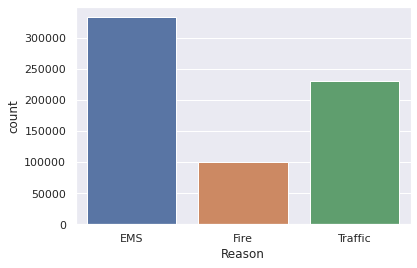

In [9]:
sns.countplot(data=df, x='Reason')

___
Now I'll concentrate more on the time information, by converting for first the 'timeStamp' feature from object to a DateTime object (using pd.to_datetime).

In [10]:
df['timeStamp'].dtype

dtype('O')

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].dtype

dtype('<M8[ns]')

Now It's possible to read time values from the 'timeStamp' feature. Indeed, I take advantage from this to create 3 new columns, dedicated to hour, month and day of the week of the call.

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda d: d.hour)
df['Month'] = df['timeStamp'].apply(lambda d: d.month)
df['Day of Week'] = df['timeStamp'].apply(lambda d: d.weekday())

# 'Day of Week' convertion
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].apply(
    lambda d: dmap[d] if (type(d) == int) else d)

For each weekday let's see the number of 911 calls, always divided by reason:

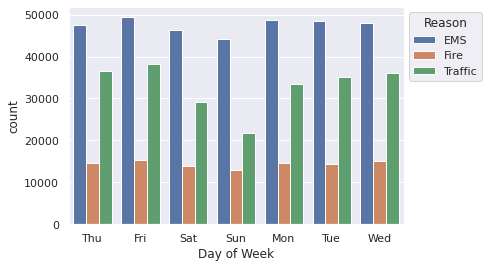

In [13]:
ax = sns.countplot(data=df, x='Day of Week', hue='Reason')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Same thing for the month:

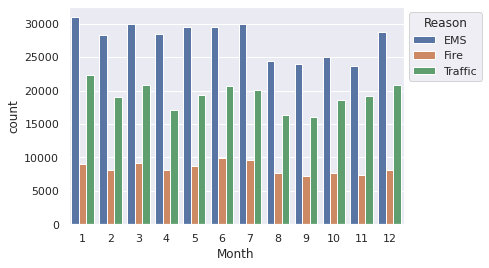

In [14]:
ax = sns.countplot(data=df, x='Month', hue='Reason')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

- - -
Also based on the last countplot, what I'll try to do now is to create a linear fit on the number of calls per month. We grouped the dataset for month indeed:

In [15]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


Let's start with a simple lineplot to see how the 911 calls goes through the months:

<AxesSubplot:xlabel='Month'>

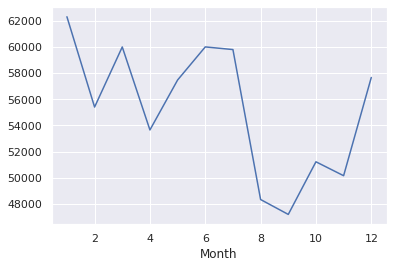

In [16]:
# the 'twp' coloumn is chosen by random, since the dataframe is grouped by month
byMonth['twp'].plot.line()

The I can pass plotting an lmplot(), to create a linear fit on the number of calls per month.

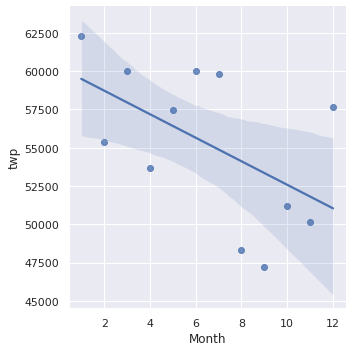

In [17]:
byMonth['Month'] = byMonth.index
sns.lmplot(data=byMonth, x='Month', y='twp')

- - -
Let's pass on analyzing number of 911 calls through the days instead. 

For first, I create a new feature "Date", always taking the data from the 'timeStamp' column.

In [18]:
df['Date'] = df['timeStamp'].apply(lambda d: d.date())

Now I can start plotting a linechart to see the 911 calls trend:

[Text(0.5, 1.0, 'Number of 911 calls per days')]

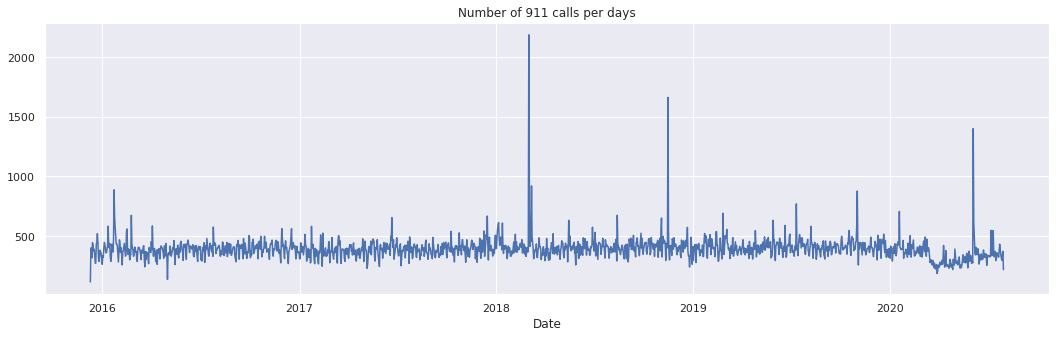

In [19]:
byDate = df.groupby('Date').count()
byDate['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days')

This, followed by a plot for each of the 3 calls reson.

[Text(0.5, 1.0, 'Number of 911 calls per days, due to EMS reasons')]

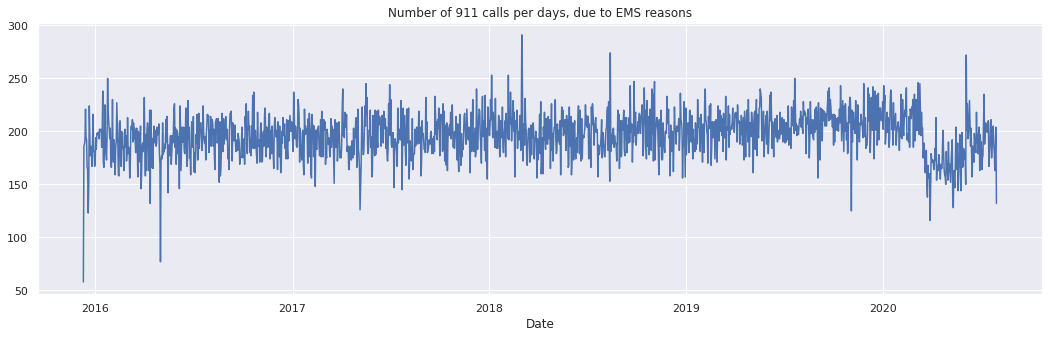

In [20]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to EMS reasons')

[Text(0.5, 1.0, 'Number of 911 calls per days, due to traffic reasons')]

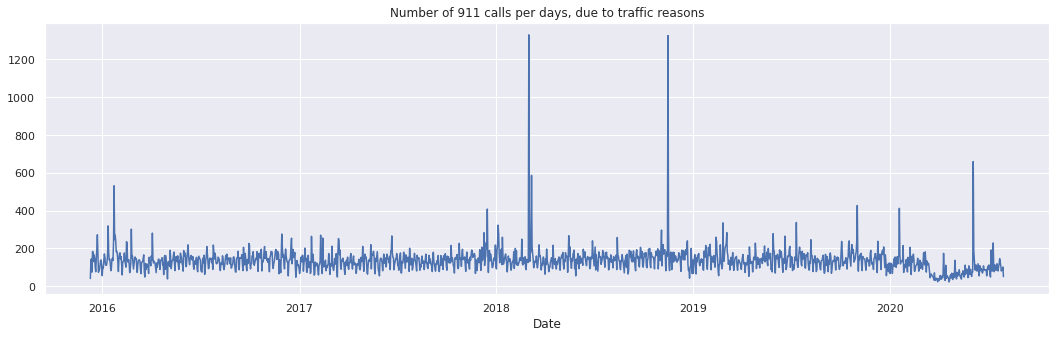

In [21]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to traffic reasons')

[Text(0.5, 1.0, 'Number of 911 calls per days, due to fire reasons')]

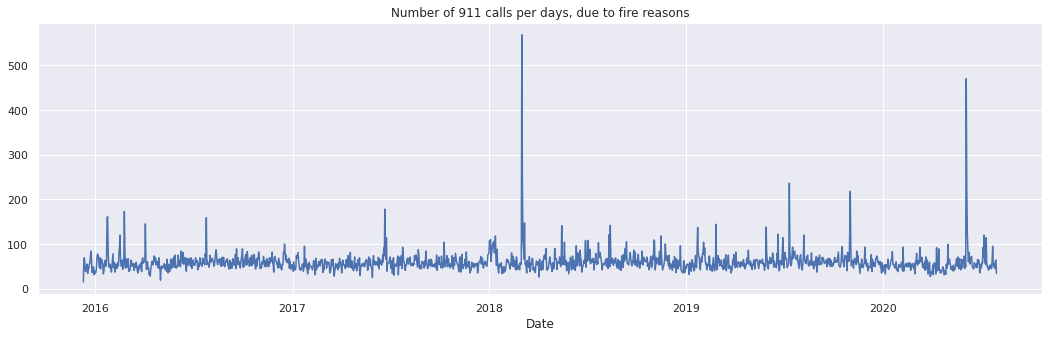

In [22]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to fire reasons')

____
In the last part of the EDA of this dataset, we concentrate on correlating time data using heatmap and clustermap.

I start creating a matrix to show the number of 911 calls for each hour of the day of week.

In [23]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


Firstly, let's plot this matrix in a heatmap:

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

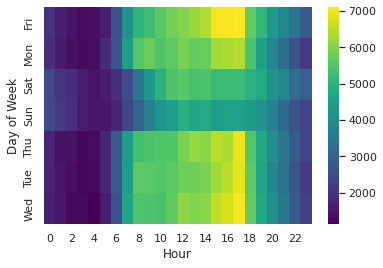

In [24]:
sns.heatmap(dayHour, cmap='viridis')

Then, to see common values grouped together, we pass to a clustermap:

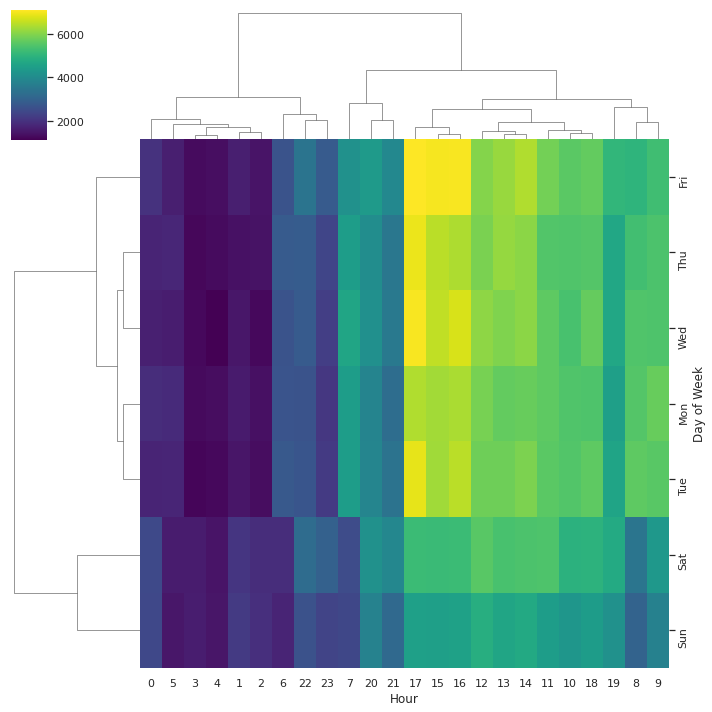

In [25]:
sns.clustermap(dayHour, cmap='viridis')

As we can expect and see from the 2 plots, most of the calls are concentrated in the most active hours of the afternoon (15, 16 and 17).

In this case, we a concentration especially on Friday.

Now I reapeat the same procedure, replacing the hours with the month.

In [26]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Mon,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Sat,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sun,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thu,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147
Tue,9711,8083,8370,7561,9020,8340,9078,7289,6597,7946,7341,8301
Wed,9406,8294,8987,7598,9034,9440,8576,7979,6842,7871,7407,7677


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

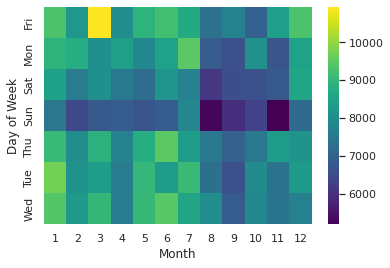

In [27]:
sns.heatmap(dayMonth, cmap='viridis')

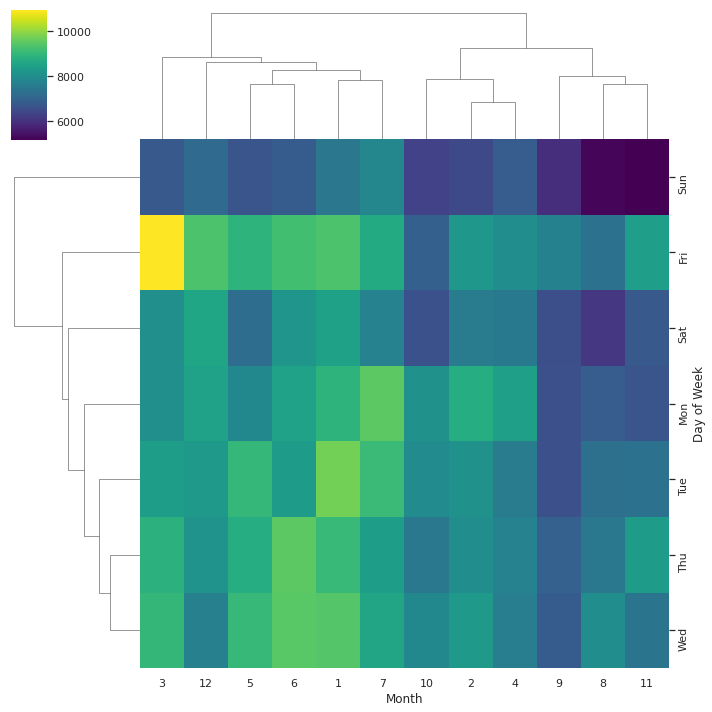

In [28]:
sns.clustermap(dayMonth, cmap='viridis')

The result seen on the heatmap and on the clustermap is the concentration of the 911 calls on the Fridays of March. 